(16180, 16)


D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cros

D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\numpy\lib\fu

D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at 

D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3

D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: Us

D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c 

D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3

D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cros

D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points i

D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3

D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at 

D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\fu

D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:353: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return self.fit(X, sample_

[-6.4208788522751385, -6.345275661666466, -6.277765151331469, -6.266548079140641, -6.210931031538624, -6.198344113271993, -6.168987527432409, -6.149643947942535]


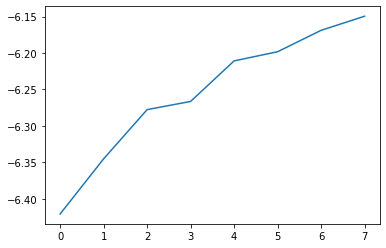

In [12]:
"""
Created on March 30, 2018

@author: Alejandro Molina
"""

import numpy as np

from spn.algorithms.StructureLearning import get_next_operation, learn_structure
from spn.algorithms.CnetStructureLearning import get_next_operation_cnet, learn_structure_cnet
from spn.algorithms.Validity import is_valid

from spn.structure.Base import Sum, assign_ids

from spn.structure.leaves.histogram.Histograms import create_histogram_leaf
from spn.structure.leaves.parametric.Parametric import create_parametric_leaf
from spn.structure.leaves.piecewise.PiecewiseLinear import create_piecewise_leaf
from spn.structure.leaves.cltree.CLTree import create_cltree_leaf
from spn.algorithms.splitting.Conditioning import (
    get_split_rows_naive_mle_conditioning,
    get_split_rows_random_conditioning,
)
import logging

logger = logging.getLogger(__name__)





def get_splitting_functions(cols, rows, ohe, threshold, rand_gen, n_jobs, k=2):
    from spn.algorithms.splitting.Clustering import get_split_rows_KMeans, get_split_rows_TSNE, get_split_rows_GMM
    from spn.algorithms.splitting.PoissonStabilityTest import get_split_cols_poisson_py
    from spn.algorithms.splitting.RDC import get_split_cols_RDC_py, get_split_rows_RDC_py

    if isinstance(cols, str):
        if cols == "rdc":
            split_cols = get_split_cols_RDC_py(threshold, rand_gen=rand_gen, ohe=ohe, n_jobs=n_jobs)
        elif cols == "poisson":
            split_cols = get_split_cols_poisson_py(threshold, n_jobs=n_jobs)
        else:
            raise AssertionError("unknown columns splitting strategy type %s" % str(cols))
    else:
        split_cols = cols

    if isinstance(rows, str):
        if rows == "rdc":
            split_rows = get_split_rows_RDC_py(rand_gen=rand_gen, ohe=ohe, n_jobs=n_jobs)
        elif rows == "kmeans":
            split_rows = get_split_rows_KMeans(n_clusters=k)
        elif rows == "tsne":
            split_rows = get_split_rows_TSNE()
        elif rows == "gmm":
            split_rows = get_split_rows_GMM()
        else:
            raise AssertionError("unknown rows splitting strategy type %s" % str(rows))
    else:
        split_rows = rows
    return split_cols, split_rows

import pandas as pd
from spn.structure.Base import Context
from spn.structure.StatisticalTypes import MetaType

cols="rdc"
rows="kmeans"
min_instances_slice=200
threshold=0.3
ohe=False
leaves = create_histogram_leaf
rand_gen=None
cpus=-1

df = pd.read_csv("spn/data/binary/nltcs.ts.data", sep=',')
data = df.values
print(data.shape)
samples, var = data.shape
ds_context = Context(meta_types=[MetaType.DISCRETE]*var)
ds_context.add_domains(data)

df2 = pd.read_csv("spn/data/binary/nltcs.test.data", sep=',')
test = df2.values

ll = list()

for k in range(2, 10):
	split_cols, split_rows = get_splitting_functions(cols, rows, ohe, threshold, rand_gen, cpus, k=k)
	nextop = get_next_operation(min_instances_slice)

	spn = learn_structure(data, ds_context, split_rows, split_cols, leaves, nextop)

	from spn.io.Graphics import plot_spn

	#plot_spn(spn, 'basicspn'+str(k)+'.png')

	from spn.algorithms.Inference import log_likelihood
	total_ll = 0
	for instance in test:
		import numpy as np
		test_data = np.array(instance).reshape(-1, var)
		total_ll += log_likelihood(spn, test_data)[0][0]
	ll.append(total_ll/len(test))

print(ll)
import matplotlib.pyplot as plt 

# plot line 
plt.plot(ll) 
plt.show()
